#Exploratory Data Analysis (EDA) of Microservice Tracing Data

Microservices architecture is a software development approach where an application is composed of small, independent services that communicate over well-defined APIs. This project focuses on analyzing microservice traces to gain insights into the performance and behavior of these services. The primary goal is to perform exploratory data analysis (EDA) on the provided trace data, which will help identify patterns, trends, and potential anomalies in the duration of various operations.

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# reading data
df = pd.read_csv('traces_data.csv', header=0)
df = df.reset_index()
df.columns = ['Timestamp', 'TraceID', 'SpanID', 'ParentSpanID', 'ServiceName', 'Name', 'DurationNano', 'NA']
df.drop('NA', axis=1, inplace=True)
df.head()

,Timestamp,TraceID,SpanID,ParentSpanID,ServiceName,Name,DurationNano
0,2023-11-23 04:42:32.707303516,d8d992638d73274d0a6710a1f9d17f93,0d87dcf5ea5aeaab,NaN,featureflagservice,/,887477
1,2023-11-23 04:42:32.707459680,d8d992638d73274d0a6710a1f9d17f93,bd0a6f75f1a901b7,0d87dcf5ea5aeaab,featureflagservice,featureflagservice.repo.query:featureflags,481634
2,2023-11-23 04:42:33.930086000,fab7ab123d61c8d7d71062fc44ffb87e,fe4acd4c8a763d24,NaN,frontend-proxy,ingress,213000
3,2023-11-23 04:42:36.928455000,39a34f6b196aa69cdd5364bfc73b35b4,b3c68f9f4a73524b,NaN,frontend-proxy,ingress,602000
4,2023-11-23 04:42:39.923633000,61e0ffa4c695a832b05f406999cf319c,b204b9bce1b3ac35,NaN,frontend-proxy,ingress,556000


In [3]:
#shape of data
df.shape

(183615, 7)

In [4]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183615 entries, 0 to 183614
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Timestamp     183615 non-null  object
 1   TraceID       183615 non-null  object
 2   SpanID        183615 non-null  object
 3   ParentSpanID  141834 non-null  object
 4   ServiceName   183615 non-null  object
 5   Name          183615 non-null  object
 6   DurationNano  183615 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 9.8+ MB


In [5]:
# missing values in columns
df.isnull().sum()

Timestamp           0
TraceID             0
SpanID              0
ParentSpanID    41781
ServiceName         0
Name                0
DurationNano        0
dtype: int64

In [6]:
# describe data for DurationNano
df[['DurationNano']].describe()

,DurationNano
count,1.836150e+05
mean,5.414918e+06
std,2.077879e+07
min,0.000000e+00
25%,3.357000e+05
50%,1.584906e+06
75%,6.832718e+06
max,4.999858e+09


- The average duration for the different services is 5.41 * 10^6 Nano seconds

In [7]:
# Number of unique values in each column
df.nunique()

Timestamp       159340
TraceID          41792
SpanID          183615
ParentSpanID    107233
ServiceName         17
Name                66
DurationNano    126244
dtype: int64

- For TraceID we have 41792 unique request path through the system
- For SpanID we have 183615 unique operations taking place
- We have 107233 SpanID with ParentSpanID
- There are 17 different microservices involved
- There are 66 unique endpoint being logged

### Plotting Graphs

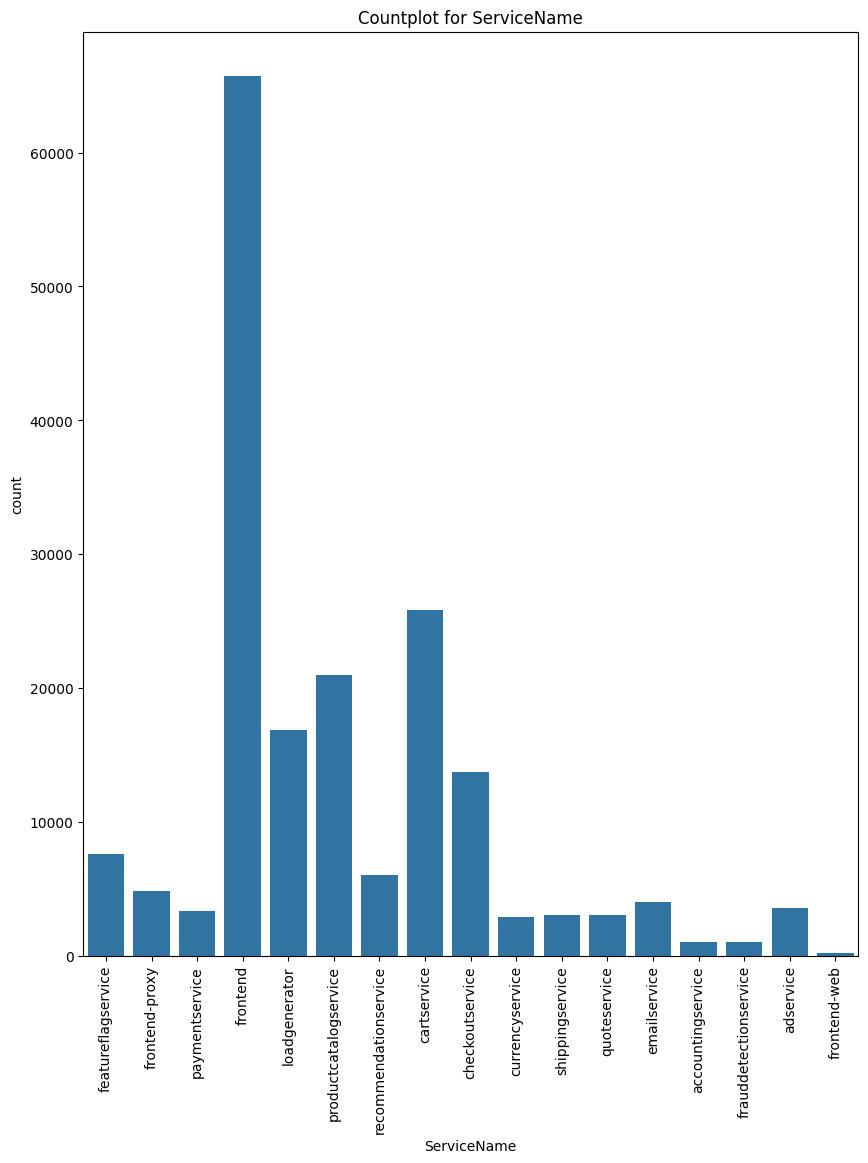

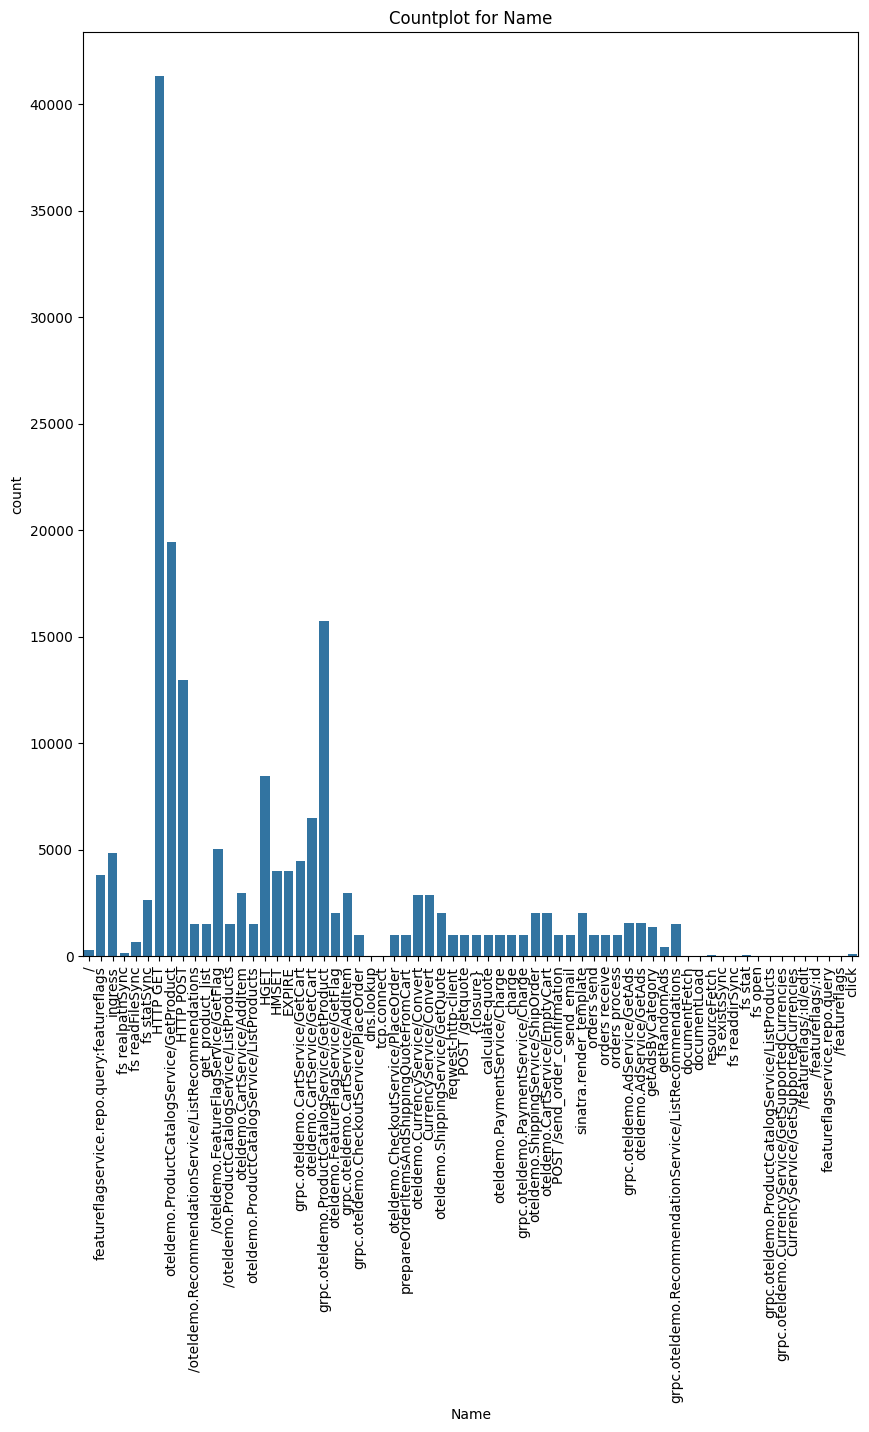

In [8]:
#Countplot for ServiceName and Name
for i in ['ServiceName', 'Name']:
  plt.figure(figsize = [10,12])
  sns.countplot(data = df, x = i)
  plt.title(f'Countplot for {i}')
  plt.xticks(rotation=90)
  plt.show()

- From the above plot for ServiceName we can see that the microservice that is used most is frontend followed by cartservice, productcatalogservice and loadgenerator.
-From the Name plot we can see that the method being executed are HTTP GET followed by oteldemo.Productcatalogservice/GetProduct, grpc.oteldemo.ProductCatalogService/Getproduct and HTTP Post

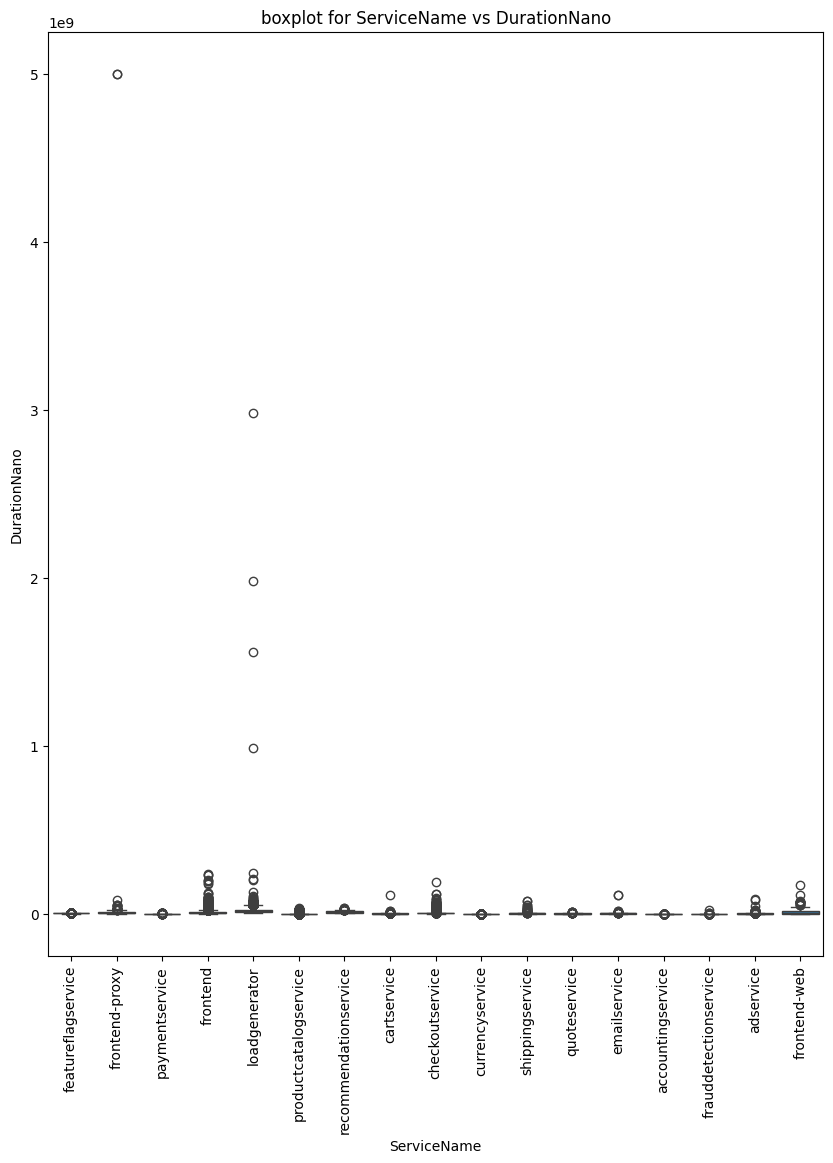

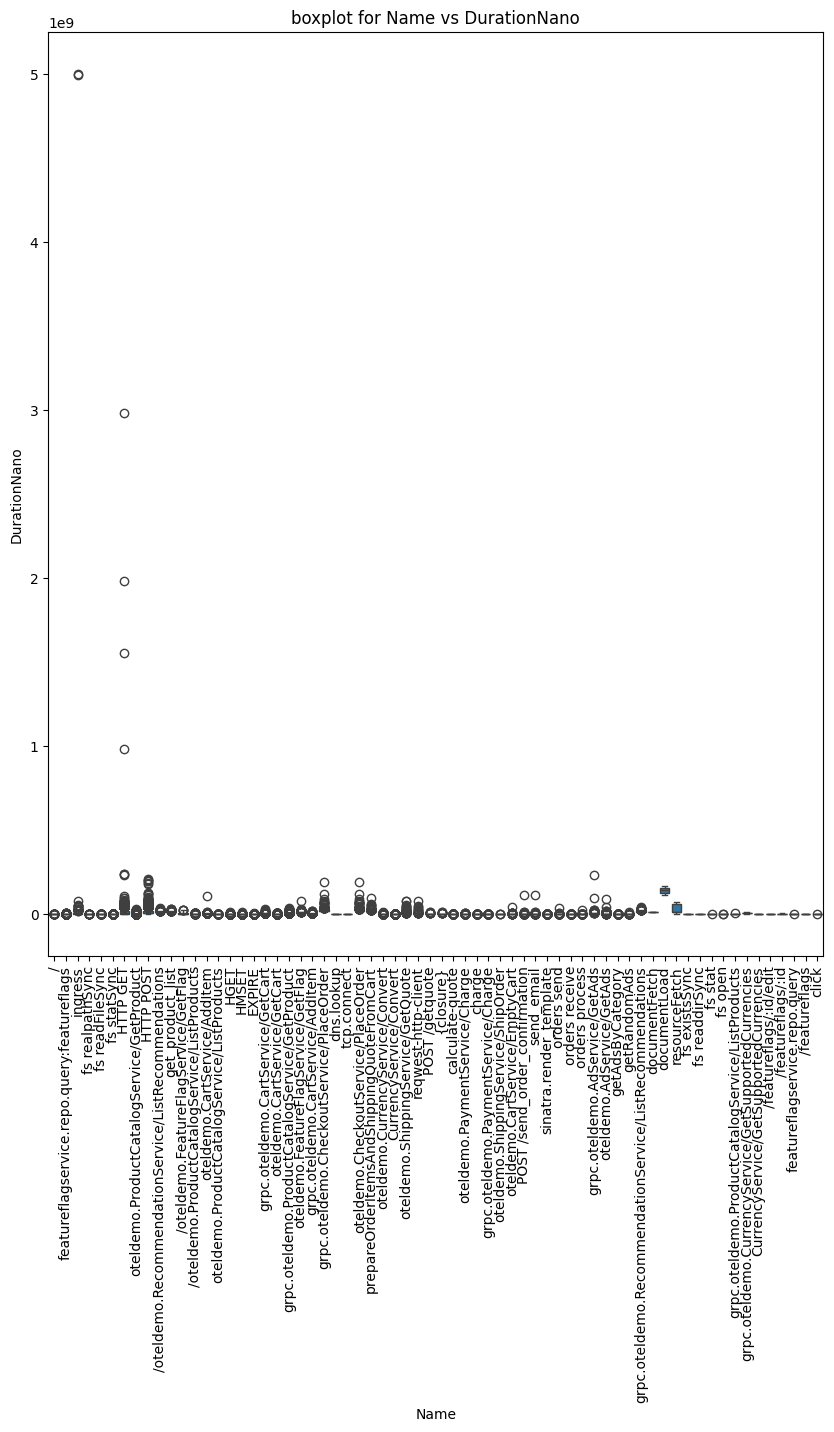

In [9]:
for i in ['ServiceName', 'Name']:
  plt.figure(figsize = [10,12])
  sns.boxplot(data = df, x = i, y = 'DurationNano')
  plt.title(f'boxplot for {i} vs DurationNano')
  plt.xticks(rotation=90)
  plt.show()

- From the boxplot we can observe that in the boxplot for ServiceName vs DurationNano we have extreme outlier in case of frontend-proxy and loadgenerator.
- From the boxplot between Name vs DurationNano We can observe that ingress and HTTP GET has clear outliers.

In [19]:
#description of count of span per trace
df.groupby(by='TraceID')[['SpanID']].count().describe()

,SpanID
count,41792.000000
mean,4.393544
std,7.246159
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,62.000000


In [29]:
#average duration per service
df.groupby(by='ServiceName')[['DurationNano']].mean().sort_values(by='DurationNano', ascending=False)

,DurationNano
ServiceName,
loadgenerator,1.847588e+07
frontend-web,1.305869e+07
recommendationservice,9.706576e+06
frontend-proxy,7.858884e+06
frontend,6.863503e+06
checkoutservice,4.100306e+06
productcatalogservice,1.673416e+06
shippingservice,1.428734e+06
adservice,1.399567e+06


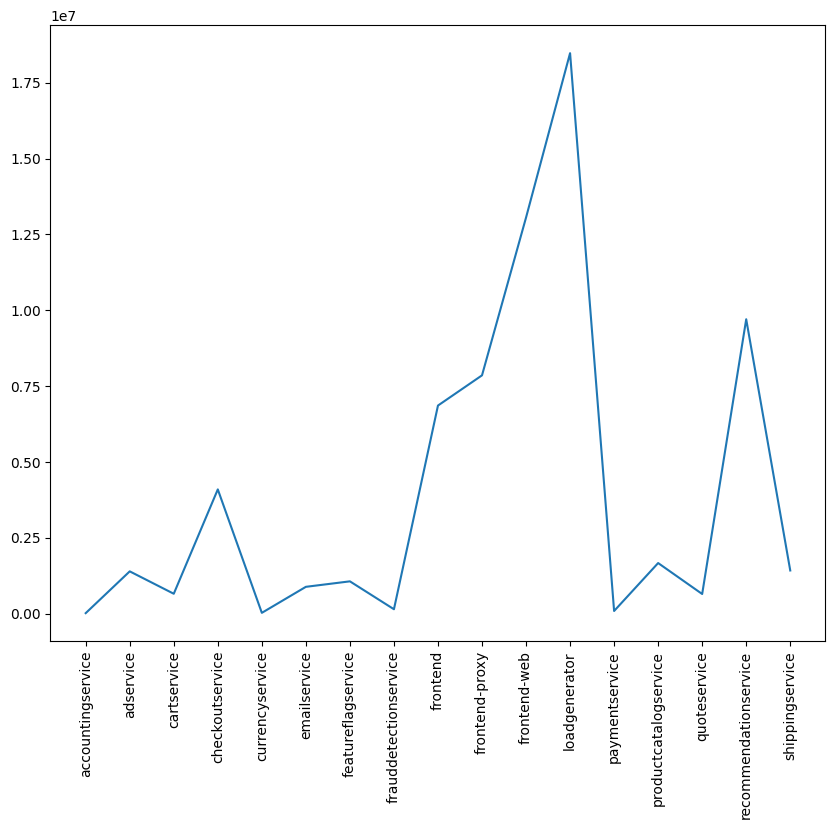

In [25]:
# Average DurationNano per Service
plt.figure(figsize=[10,8])
plt.plot(df.groupby(by='ServiceName')[['DurationNano']].mean())
plt.xticks(rotation=90)
plt.show()

- From the above plot we can see that loadgenerator has the highest average time among ServiceName which is consistent with our previous findings.

In [28]:
#average duration per method
df.groupby(by='Name')[['DurationNano']].mean().sort_values(by='DurationNano', ascending=False)

,DurationNano
Name,
documentLoad,1.408501e+08
resourceFetch,3.148822e+07
grpc.oteldemo.CheckoutService/PlaceOrder,2.267590e+07
oteldemo.CheckoutService/PlaceOrder,2.165298e+07
grpc.oteldemo.RecommendationService/ListRecommendations,1.618716e+07
...,...
orders receive,2.234955e+04
oteldemo.ProductCatalogService/ListProducts,1.811204e+04
CurrencyService/GetSupportedCurrencies,1.605586e+04


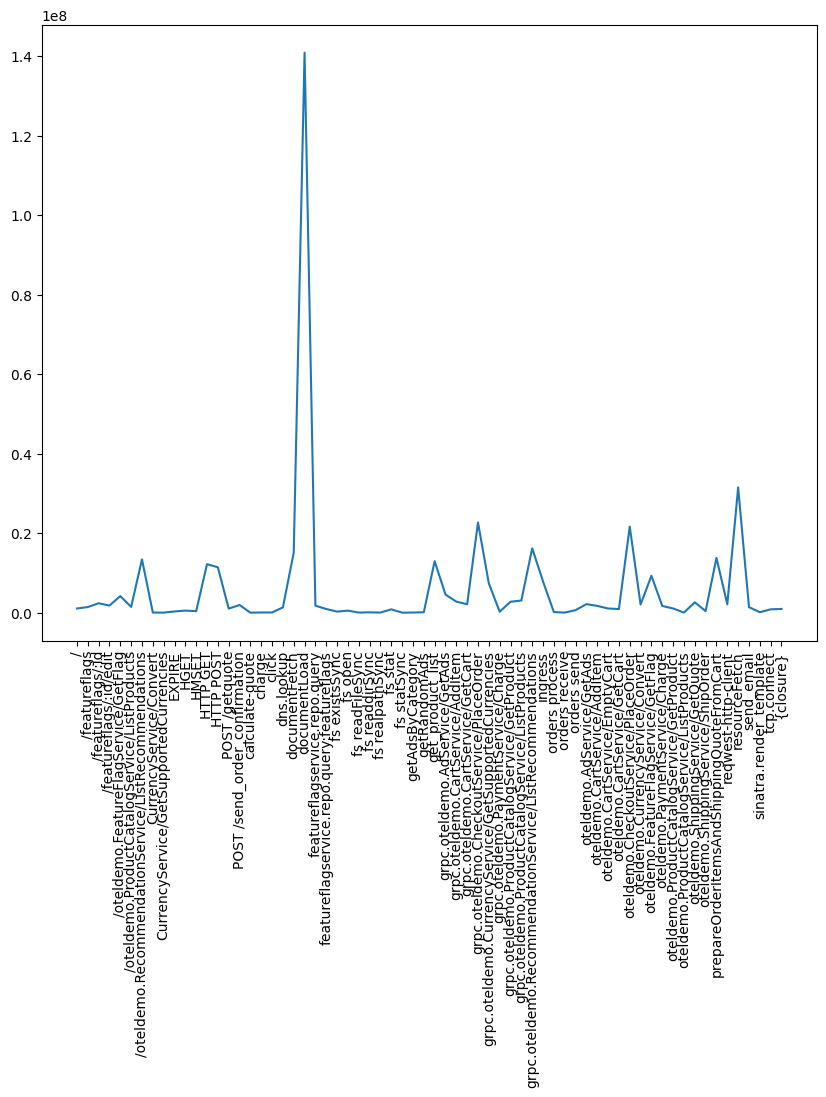

In [24]:
# Average DuratioNano per method
plt.figure(figsize=[10,8])
plt.plot(df.groupby(by='Name')[['DurationNano']].mean())
plt.xticks(rotation=90)
plt.show()

- From the plot above we can see that documentload has the highest average time in Name

### Recommendations -
- Optimize Load Generator Operations: Given that the loadgenerator service has the highest average execution time, efforts should be made to optimize its performance to ensure it does not negatively impact the overall system.
- Focus on Document Load Operations: Since documentload operations exhibit the highest average time, it would be beneficial to analyze and optimize these operations to improve efficiency.

Q) What algorithm, machine learning or AI approaches would you take to find
anomalies in the duration of a span? And why do you think that approach is a
good approach?

A - We can use IsolationForest for an0maly detection as it can work well with large data sets and does not have any assumptions about the data.
